# Part A Exploratory Data Analysis - House Regression Dataset

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

Download dataset

In [4]:
df = pd.read_csv('D:/Kaggle/House Regression/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Consider necessary columns

In [6]:
df=df[['MSSubClass', 'Utilities', 'MSZoning', 'YearBuilt', 'YearRemodAdd','TotalBsmtSF', '1stFlrSF','Heating','HeatingQC', 'CentralAir','KitchenQual' ,'Fireplaces', 'FireplaceQu','LotFrontage', 'LotArea', 'Street','LotShape','HouseStyle', 'BldgType', 'Neighborhood', 'BedroomAbvGr','GarageType','GarageArea','SaleType','SaleCondition', 'SalePrice']]
df.head()
df.tail()

,MSSubClass,Utilities,MSZoning,YearBuilt,Heating,HeatingQC,CentralAir,KitchenQual,Fireplaces,FireplaceQu,...,LotShape,HouseStyle,BldgType,Neighborhood,BedroomAbvGr,GarageType,GarageArea,SaleType,SaleCondition,SalePrice
1455,60,AllPub,RL,1999,GasA,Ex,Y,TA,1,TA,...,Reg,2Story,1Fam,Gilbert,3,Attchd,460,WD,Normal,175000
1456,20,AllPub,RL,1978,GasA,TA,Y,TA,2,TA,...,Reg,1Story,1Fam,NWAmes,3,Attchd,500,WD,Normal,210000
1457,70,AllPub,RL,1941,GasA,Ex,Y,Gd,2,Gd,...,Reg,2Story,1Fam,Crawfor,4,Attchd,252,WD,Normal,266500
1458,20,AllPub,RL,1950,GasA,Gd,Y,Gd,0,NaN,...,Reg,1Story,1Fam,NAmes,2,Attchd,240,WD,Normal,142125
1459,20,AllPub,RL,1965,GasA,Gd,Y,TA,0,NaN,...,Reg,1Story,1Fam,Edwards,3,Attchd,276,WD,Normal,147500


In [7]:
df.describe()

C:\Users\sruja\Anaconda3_4.2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,MSSubClass,YearBuilt,Fireplaces,LotFrontage,LotArea,BedroomAbvGr,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,1971.267808,0.613014,70.049958,10516.828082,2.866438,472.980137,180921.195890
std,42.300571,30.202904,0.644666,24.284752,9981.264932,0.815778,213.804841,79442.502883
min,20.000000,1872.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,34900.000000
25%,20.000000,1954.000000,0.000000,NaN,7553.500000,2.000000,334.500000,129975.000000
50%,50.000000,1973.000000,1.000000,NaN,9478.500000,3.000000,480.000000,163000.000000
75%,70.000000,2000.000000,1.000000,NaN,11601.500000,3.000000,576.000000,214000.000000
max,190.000000,2010.000000,3.000000,313.000000,215245.000000,8.000000,1418.000000,755000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
MSSubClass       1460 non-null int64
Utilities        1460 non-null object
MSZoning         1460 non-null object
YearBuilt        1460 non-null int64
Heating          1460 non-null object
HeatingQC        1460 non-null object
CentralAir       1460 non-null object
KitchenQual      1460 non-null object
Fireplaces       1460 non-null int64
FireplaceQu      770 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
HouseStyle       1460 non-null object
BldgType         1460 non-null object
Neighborhood     1460 non-null object
BedroomAbvGr     1460 non-null int64
GarageType       1379 non-null object
GarageArea       1460 non-null int64
SaleType         1460 non-null object
SaleCondition    1460 non-null object
SalePrice        1460 non-null int64
dtypes: float64(1), int64(

Number of rows and columns

In [9]:
df.shape

(1460, 23)

In [10]:
df.GarageType

0        Attchd
1        Attchd
2        Attchd
3        Detchd
4        Attchd
5        Attchd
6        Attchd
7        Attchd
8        Detchd
9        Attchd
10       Detchd
11      BuiltIn
12       Detchd
13       Attchd
14       Attchd
15       Detchd
16       Attchd
17      CarPort
18       Detchd
19       Attchd
20      BuiltIn
21       Attchd
22       Attchd
23       Attchd
24       Attchd
25       Attchd
26       Detchd
27       Attchd
28       Attchd
29       Detchd
         ...   
1430    BuiltIn
1431     Attchd
1432     Detchd
1433     Attchd
1434     Attchd
1435     Attchd
1436     Detchd
1437     Attchd
1438     Attchd
1439     Attchd
1440     Detchd
1441     Attchd
1442     Attchd
1443     Detchd
1444     Attchd
1445     Detchd
1446     Attchd
1447     Attchd
1448     Detchd
1449        NaN
1450        NaN
1451     Attchd
1452    Basment
1453        NaN
1454     Attchd
1455     Attchd
1456     Attchd
1457     Attchd
1458     Attchd
1459     Attchd
Name: GarageType, dtype:

In [11]:
df['GarageType']

0        Attchd
1        Attchd
2        Attchd
3        Detchd
4        Attchd
5        Attchd
6        Attchd
7        Attchd
8        Detchd
9        Attchd
10       Detchd
11      BuiltIn
12       Detchd
13       Attchd
14       Attchd
15       Detchd
16       Attchd
17      CarPort
18       Detchd
19       Attchd
20      BuiltIn
21       Attchd
22       Attchd
23       Attchd
24       Attchd
25       Attchd
26       Detchd
27       Attchd
28       Attchd
29       Detchd
         ...   
1430    BuiltIn
1431     Attchd
1432     Detchd
1433     Attchd
1434     Attchd
1435     Attchd
1436     Detchd
1437     Attchd
1438     Attchd
1439     Attchd
1440     Detchd
1441     Attchd
1442     Attchd
1443     Detchd
1444     Attchd
1445     Detchd
1446     Attchd
1447     Attchd
1448     Detchd
1449        NaN
1450        NaN
1451     Attchd
1452    Basment
1453        NaN
1454     Attchd
1455     Attchd
1456     Attchd
1457     Attchd
1458     Attchd
1459     Attchd
Name: GarageType, dtype:

In [12]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [13]:
np.random.seed(sum(map(ord, "distributions")))

# Density plots 
Histograms and density plots are used to show the distribution of a single variable

C:\Users\sruja\Anaconda3_4.2\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


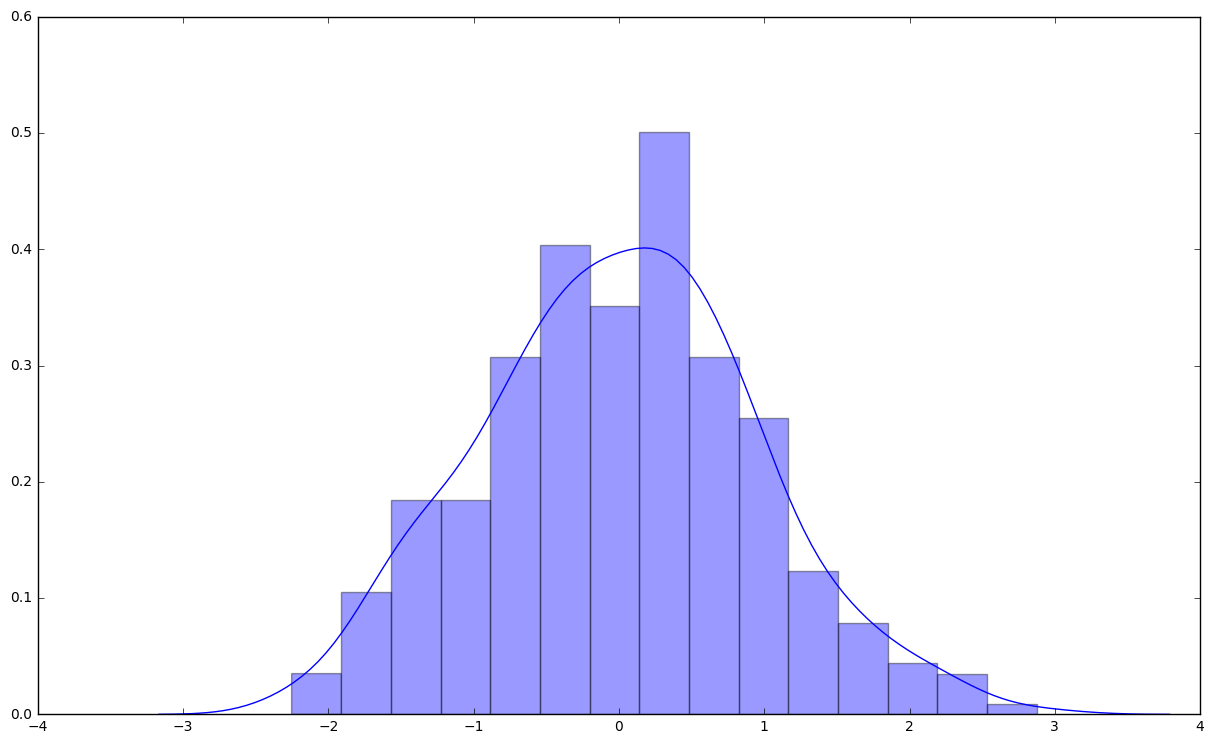

In [14]:
x = np.random.normal(size=333)
sns.distplot(x)

Density plot for Sale price

C:\Users\sruja\Anaconda3_4.2\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


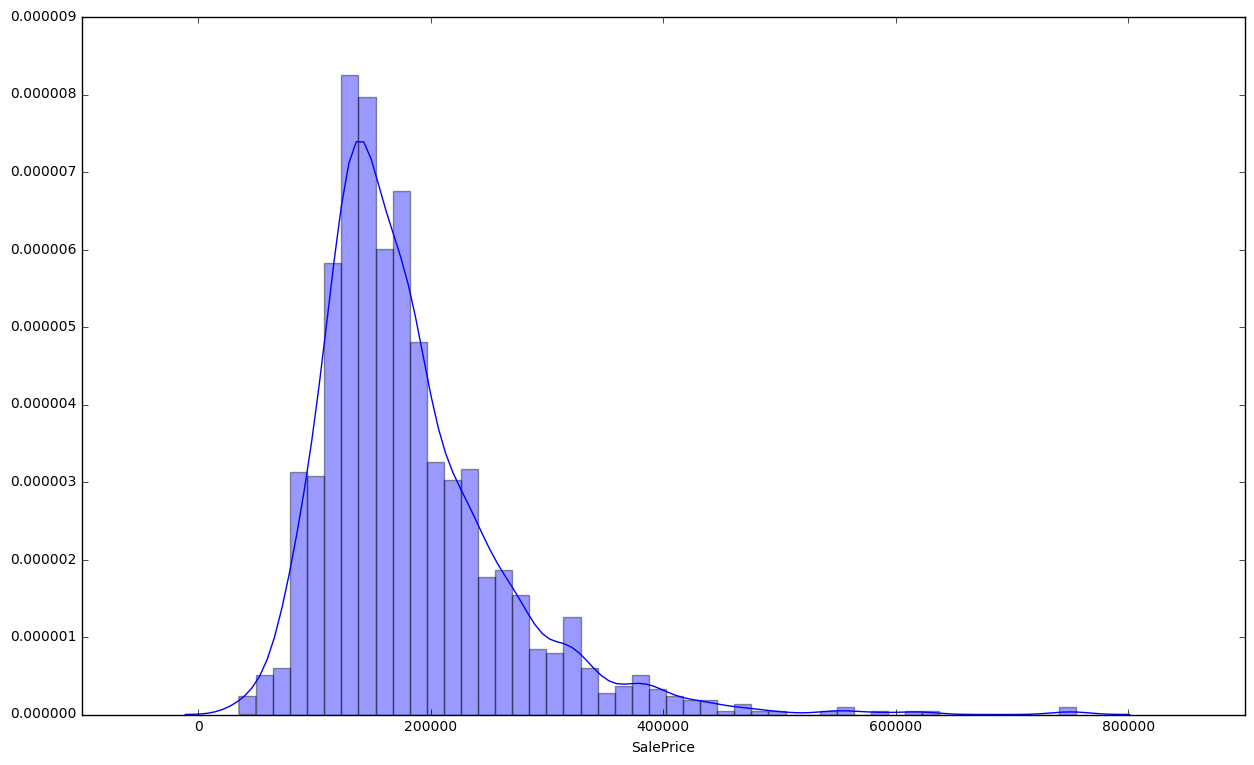

In [15]:
sns.distplot(df['SalePrice'])

# Box plot for Number of bedrooms vs Sale price

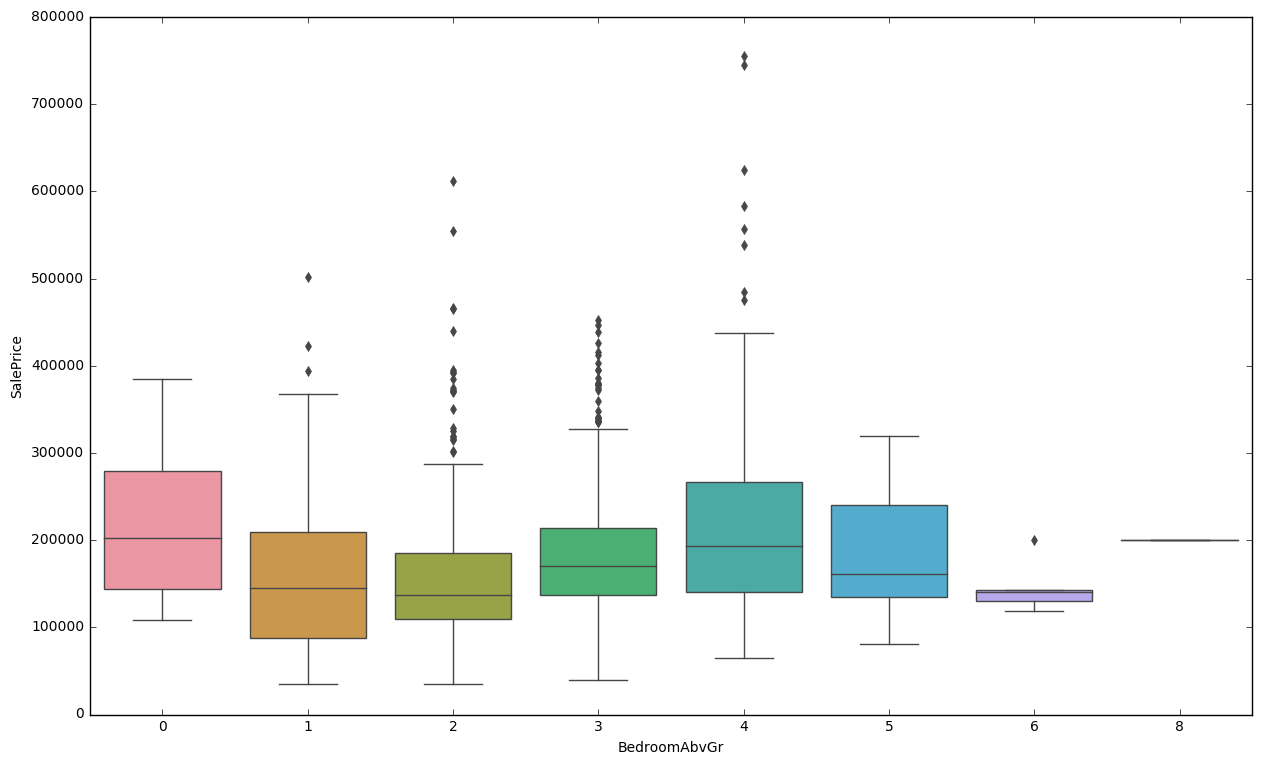

In [16]:
sns.boxplot(x="BedroomAbvGr", y="SalePrice", data=df)

# Strip plot for Garage Type

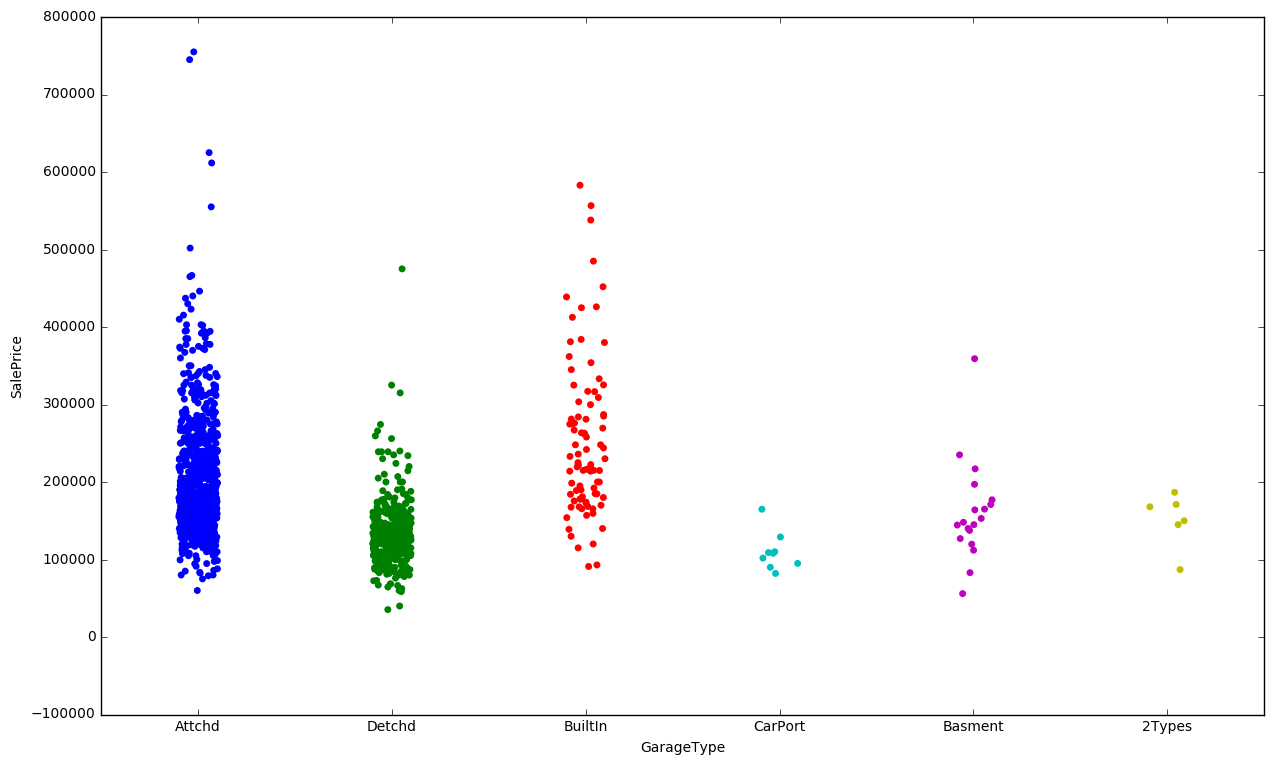

In [17]:
sns.stripplot(x="GarageType", y="SalePrice", data=df, jitter=True)

Here we see that houses with attached garage have a higher sale price than others. Builtin garages have better sale prices than basement ones. Since the dataset is fetched from a residential area in Ames Iowa, weather conditions make people prefer attached garage than the other types.

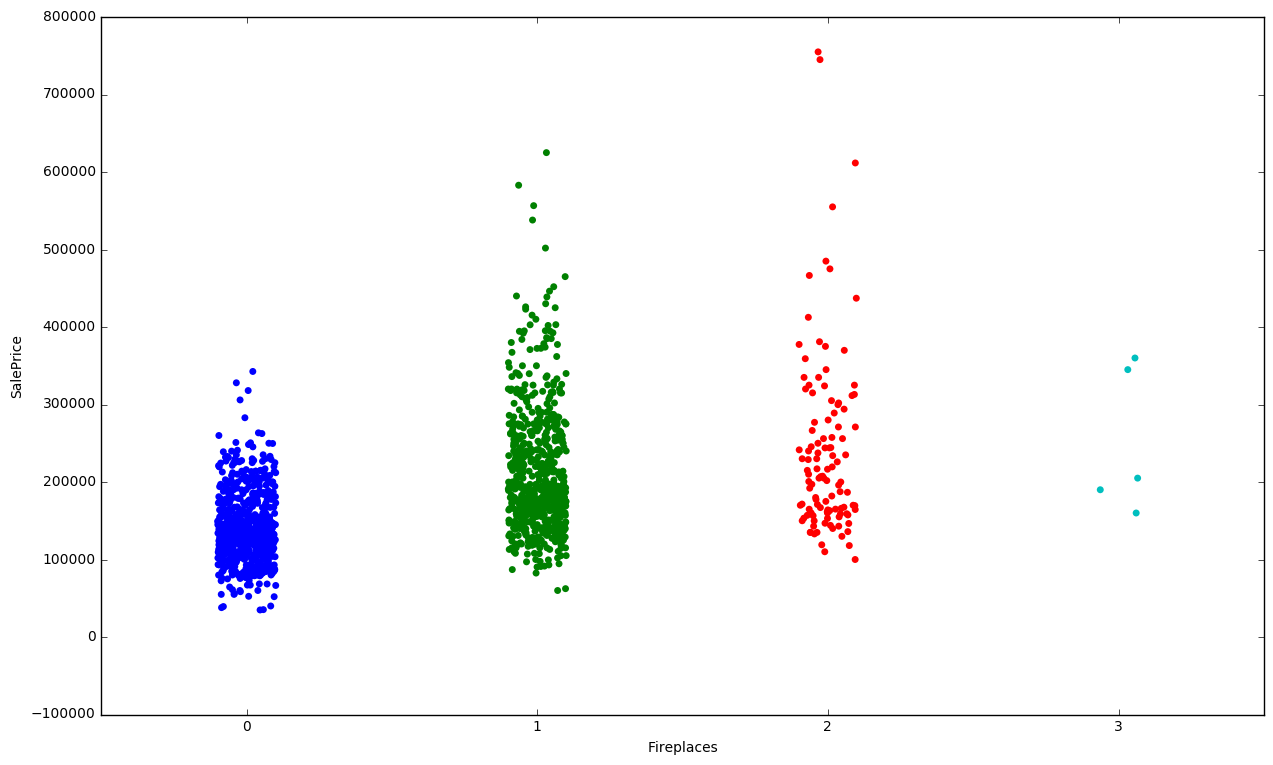

In [18]:
sns.stripplot(x="Fireplaces", y="SalePrice", data=df, jitter=True)

The above plot shows that if there is a minimum of one fireplace the sale price is higher. This shows the weather conditions of this place is severe and hence fireplaces and other heating facilities are preferred.

Gives violin plot of SalePrice depending on SaleCondition

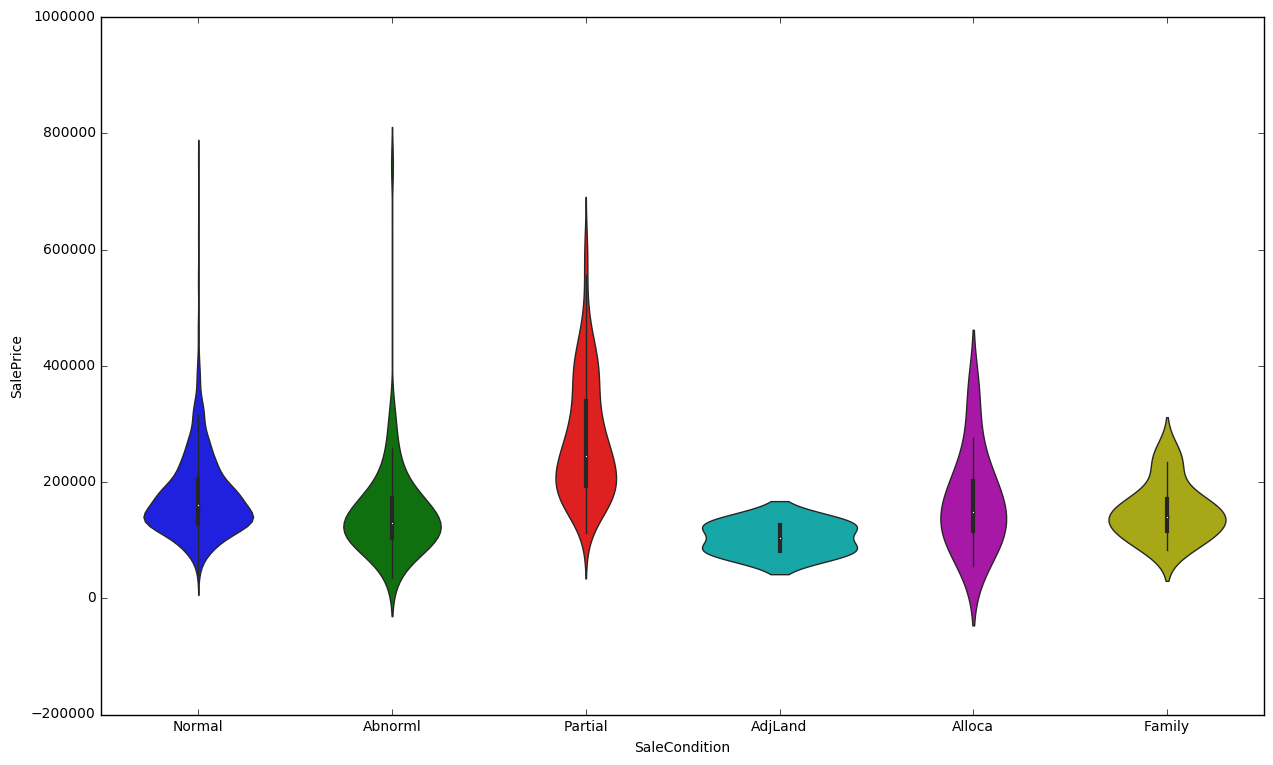

In [19]:
sns.violinplot(x="SaleCondition", y="SalePrice", data=df)

Gives violin plot of GarageType and SalePrice

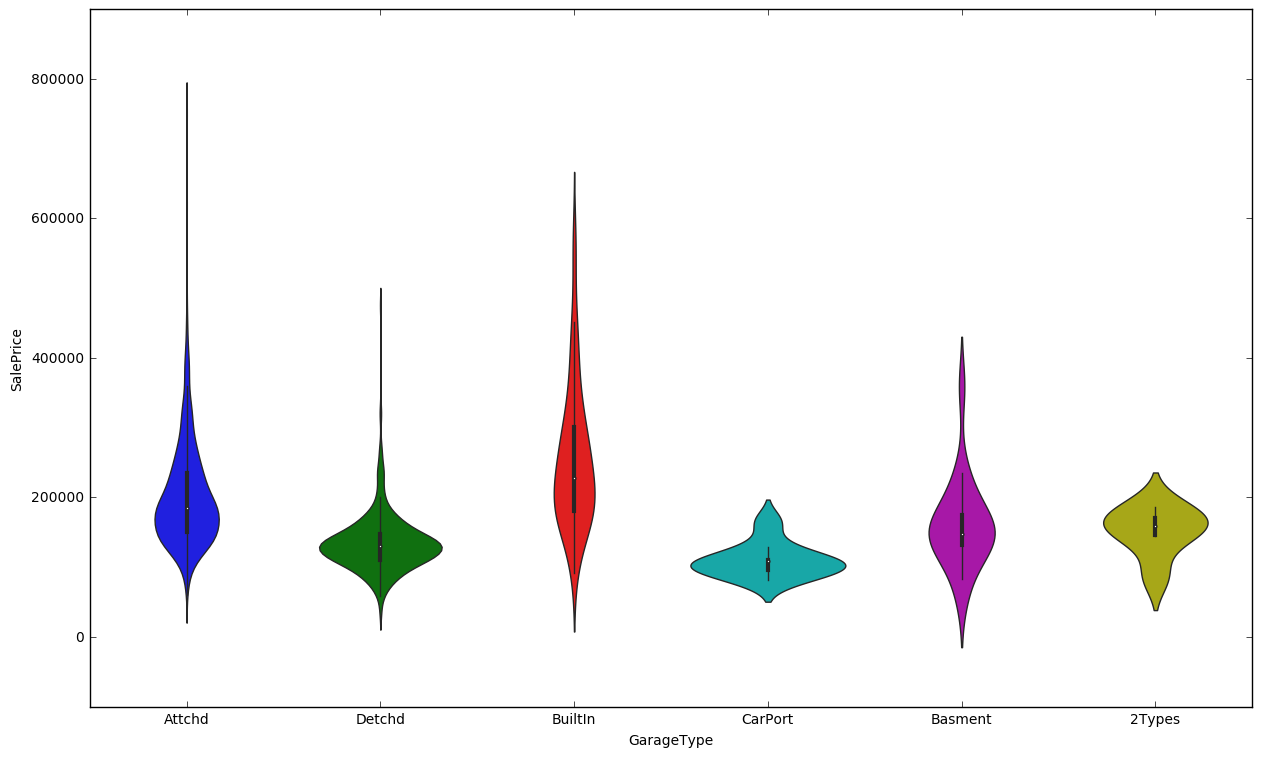

In [20]:
sns.violinplot(x="GarageType", y="SalePrice", data=df)

It is clear from the following analysis that SalePrice with Central Air condition is higher than other houses.

In [23]:
col_list2 = ['SalePrice','CentralAir']
df2 = df[col_list2]
tempdf = df2.sort_values('SalePrice',ascending=False)
ovr_df = tempdf.head(10)
ovr_df

,SalePrice,CentralAir
691,755000,Y
1182,745000,Y
1169,625000,Y
898,611657,Y
803,582933,Y
1046,556581,Y
440,555000,Y
769,538000,Y
178,501837,Y
798,485000,Y


The bottom values are attributed to houses that dont have a central air conditioning. Henceforth, we can conclude that houses with central air conditioning are the best selling houses

In [24]:
tempdf = df2.sort_values('SalePrice',ascending=False)
ovr_df = tempdf.tail(10)
ovr_df

,SalePrice,CentralAir
812,55993,N
1325,55000,N
705,55000,N
1337,52500,N
710,52000,Y
30,40000,N
533,39300,N
968,37900,N
916,35311,N
495,34900,N


# Linear plots
Number of bedrooms vs SalePrice

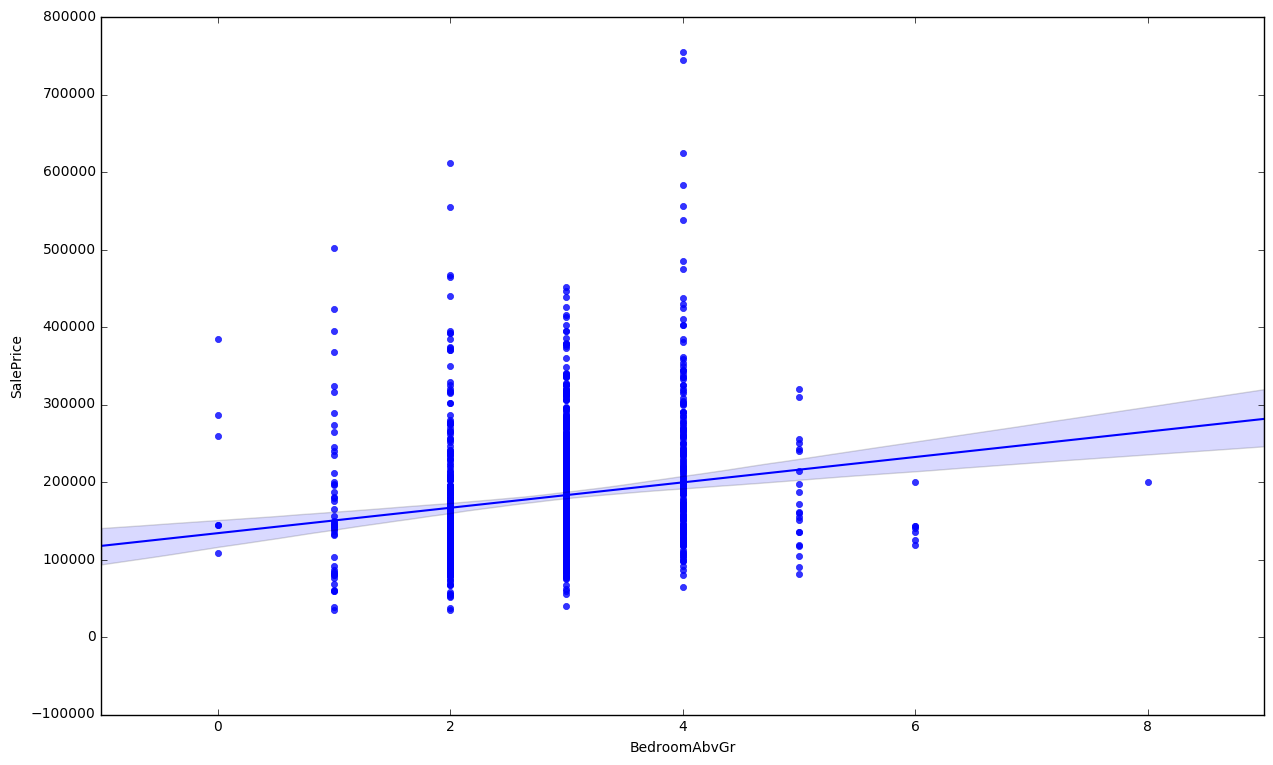

In [25]:
sns.regplot(x="BedroomAbvGr", y="SalePrice", data=df)

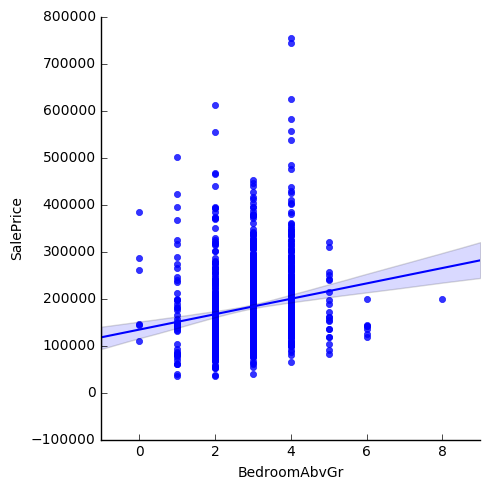

In [26]:
sns.lmplot(x="BedroomAbvGr", y="SalePrice", data=df)

------------------------------


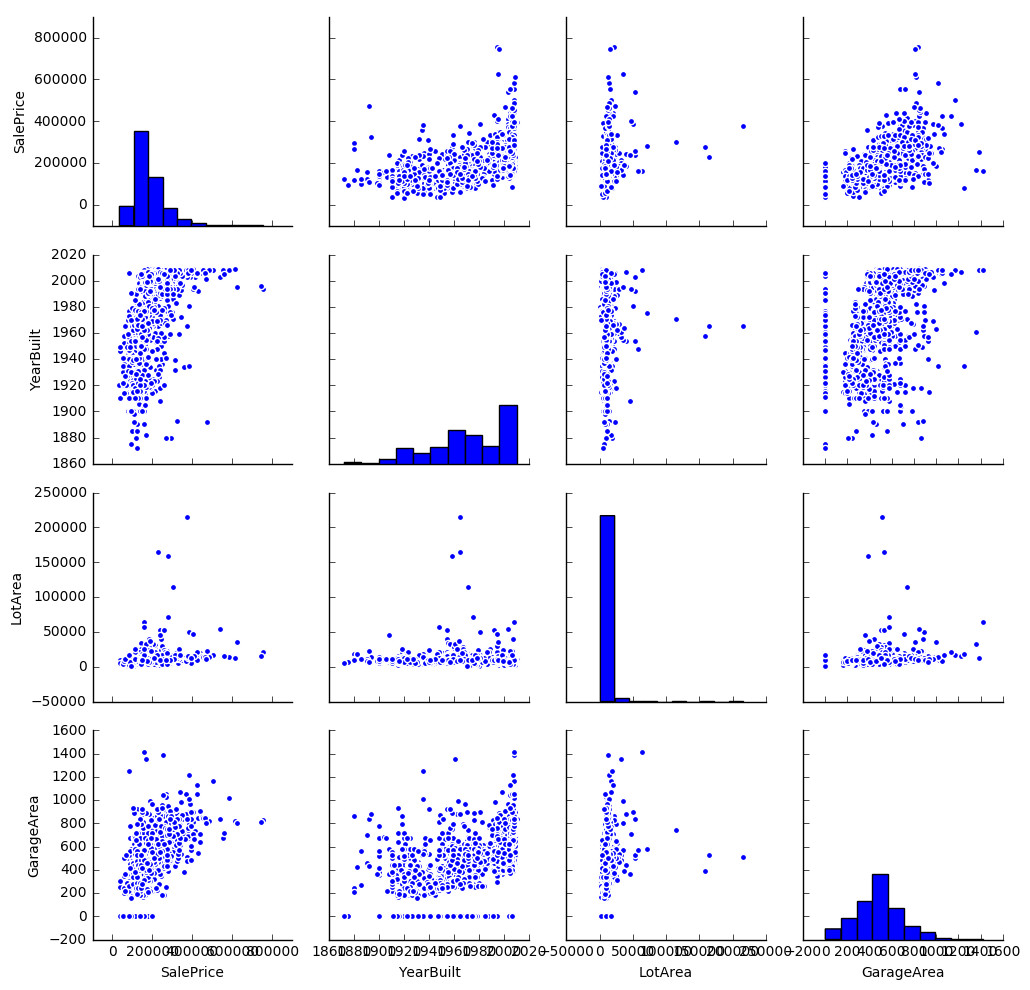

In [29]:
sns.pairplot(df[['SalePrice','YearBuilt','LotArea','GarageArea']])

print("-"*30)

# PairPlot

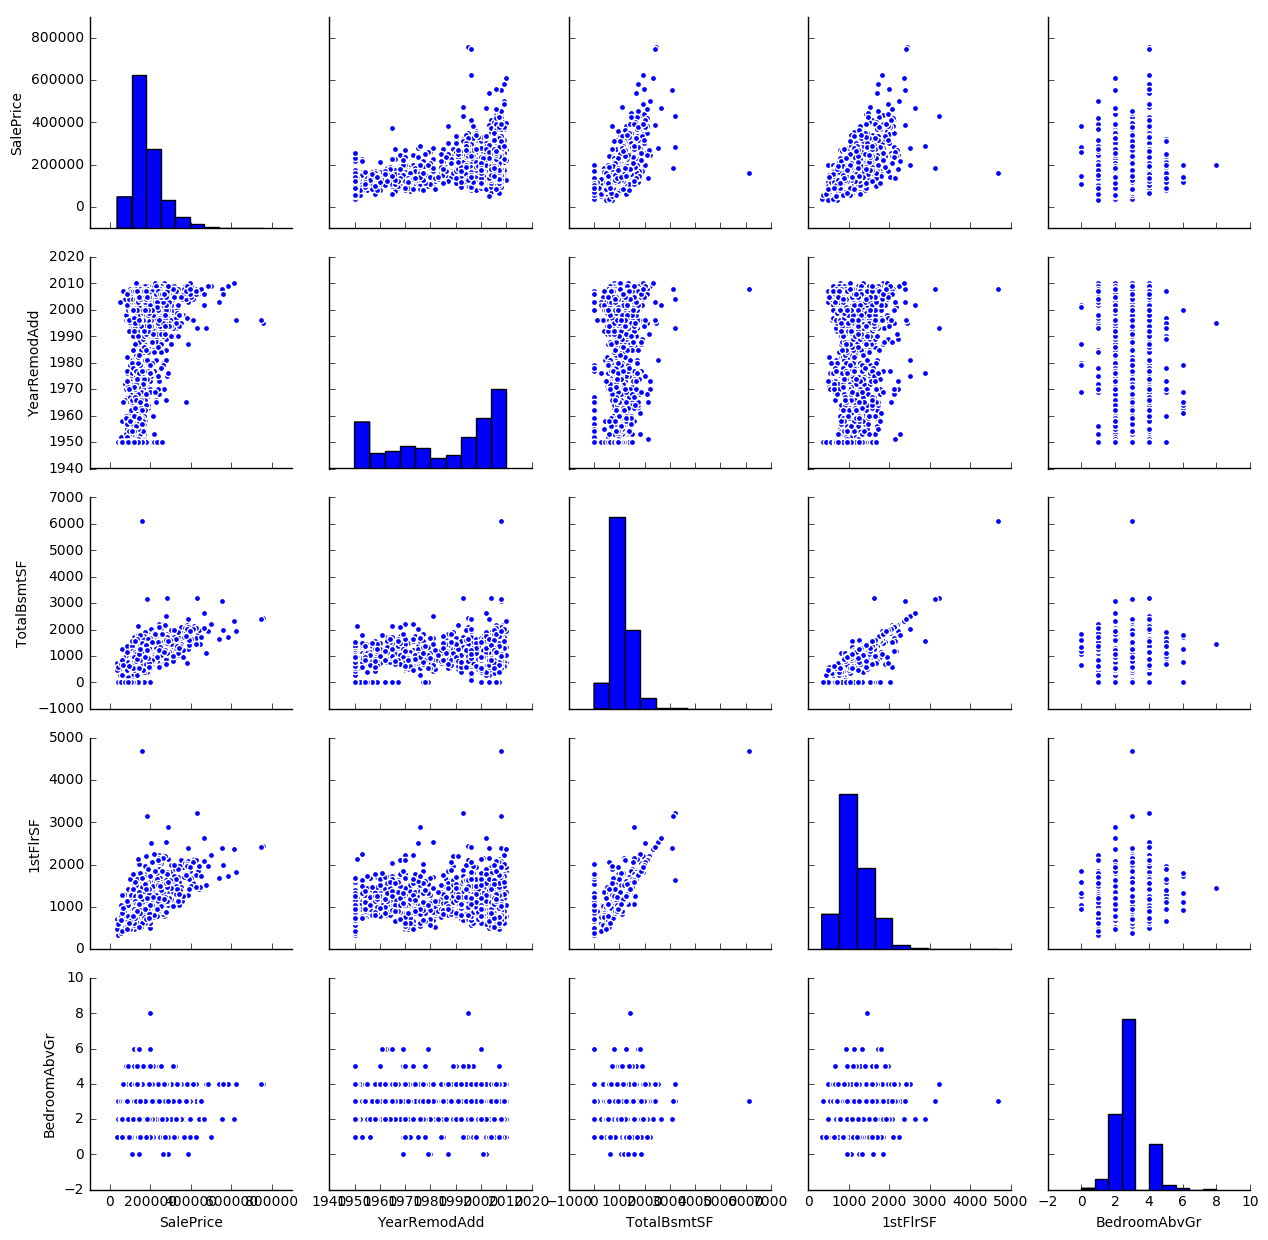

In [21]:
sns.pairplot(df[['SalePrice','YearRemodAdd','TotalBsmtSF', '1stFlrSF','BedroomAbvGr']])


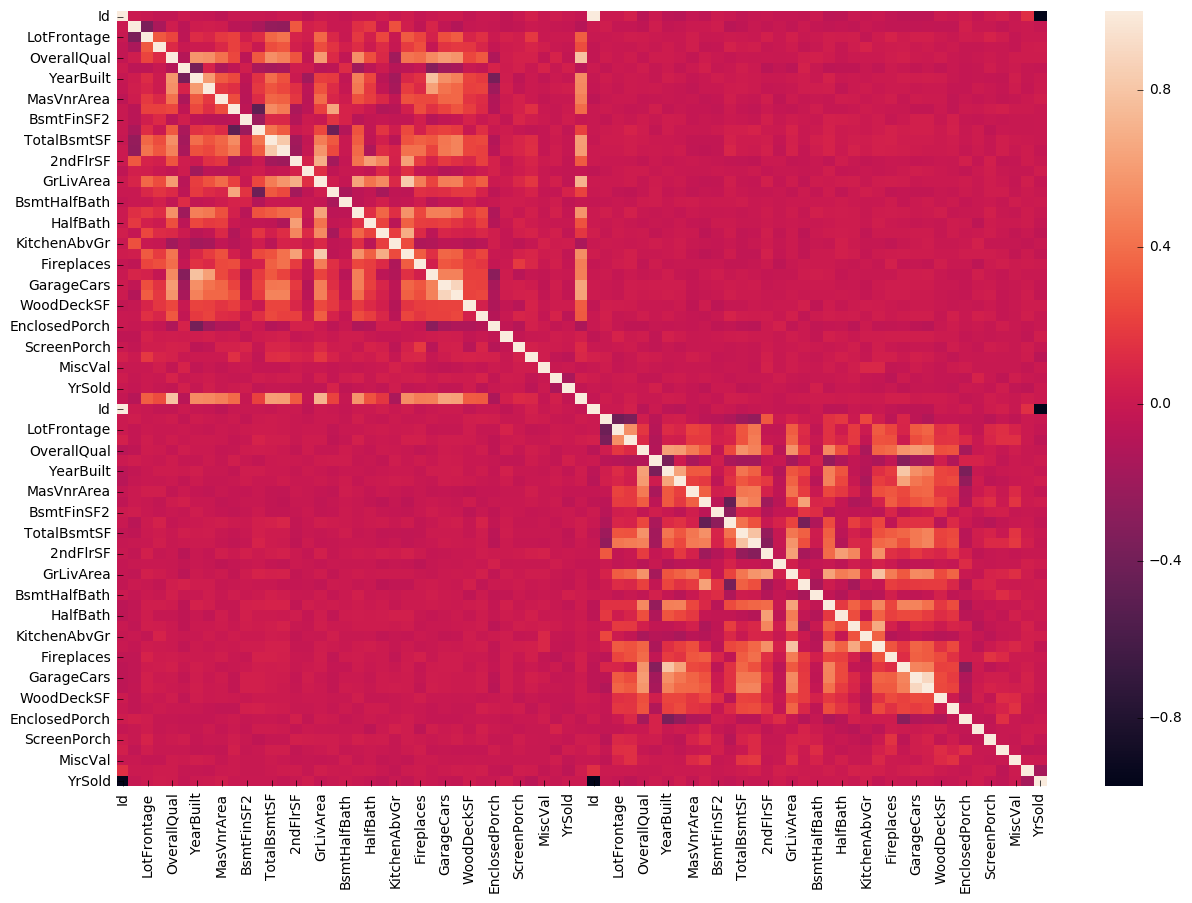

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(preProcessData.corr())

# Part B - Analyze some data

# Using RandomForestRegressor


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import Imputer

from scipy.stats import skew

plt.style.use('ggplot')

Read dataset again

In [36]:
train = 'D:/Kaggle/House Regression/train.csv'
test = 'D:/Kaggle/House Regression/test.csv'

df_train = pd.read_csv(train)
df_test = pd.read_csv(test)

Defining Median Absolute Deivation function

In [37]:
def is_outlier(points, thresh = 3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

# Plots for Sale Price and Natural log of Sale price

C:\Users\sruja\Anaconda3_4.2\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


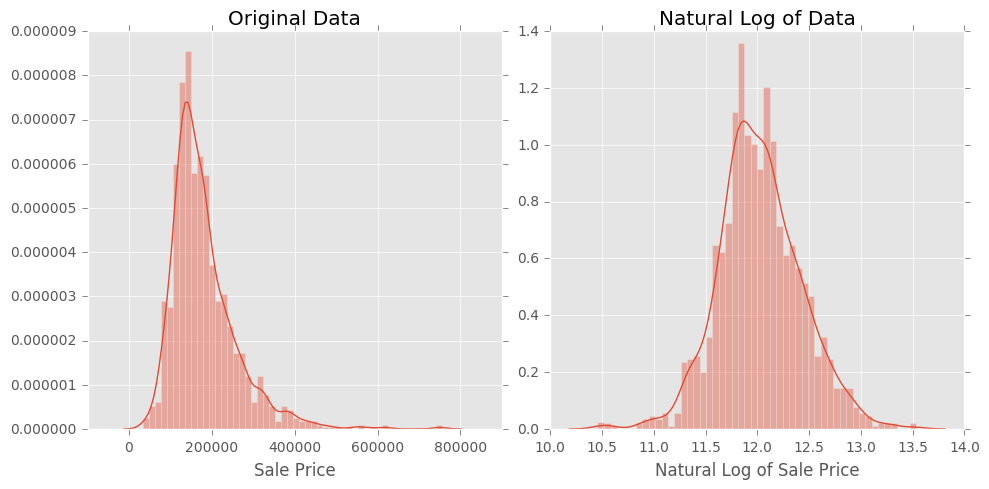

In [38]:
target = df_train[df_train.columns.values[-1]]
target_log = np.log(target)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(target, bins=50)
plt.title('Original Data')
plt.xlabel('Sale Price')

plt.subplot(1,2,2)
sns.distplot(target_log, bins=50)
plt.title('Natural Log of Data')
plt.xlabel('Natural Log of Sale Price')
plt.tight_layout()

Merge Train and Test to evaluate ranges and missing values

In [39]:
df_train = df_train[df_train.columns.values[:-1]]
df = df_train.append(df_test, ignore_index = True)

Find all categorical data

In [40]:
cats = []
for col in df.columns.values:
    if df[col].dtype == 'object':
        cats.append(col)

Create separte datasets for Continuous vs Categorical

In [41]:
df_cont = df.drop(cats, axis=1)
df_cat = df[cats]

Handle Missing Data for continuous data

In [42]:
for col in df_cont.columns.values:
    if np.sum(df_cont[col].isnull()) > 50:
        df_cont = df_cont.drop(col, axis = 1)
    elif np.sum(df_cont[col].isnull()) > 0:
        median = df_cont[col].median()
        idx = np.where(df_cont[col].isnull())[0]
        df_cont[col].iloc[idx] = median

        outliers = np.where(is_outlier(df_cont[col]))
        df_cont[col].iloc[outliers] = median
        
        if skew(df_cont[col]) > 0.75:
            df_cont[col] = np.log(df_cont[col])
            df_cont[col] = df_cont[col].apply(lambda x: 0 if x == -np.inf else x)
        
        df_cont[col] = Normalizer().fit_transform(df_cont[col].reshape(1,-1))[0]

C:\Users\sruja\Anaconda3_4.2\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Handle Missing Data for Categorical Data

In [43]:
for col in df_cat.columns.values:
    if np.sum(df_cat[col].isnull()) > 50:
        df_cat = df_cat.drop(col, axis = 1)
        continue
    elif np.sum(df_cat[col].isnull()) > 0:
        df_cat[col] = df_cat[col].fillna('MIA')
        
    df_cat[col] = LabelEncoder().fit_transform(df_cat[col])
    
    num_cols = df_cat[col].max()
    for i in range(num_cols):
        col_name = col + '_' + str(i)
        df_cat[col_name] = df_cat[col].apply(lambda x: 1 if x == i else 0)
        
    df_cat = df_cat.drop(col, axis = 1)

C:\Users\sruja\Anaconda3_4.2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sruja\Anaconda3_4.2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sruja\Anaconda3_4.2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

Merge Numeric and Categorical Datasets and Create Training and Testing Data

In [44]:
df_new = df_cont.join(df_cat)

df_train = df_new.iloc[:len(df_train) - 1]
df_train = df_train.join(target_log)

df_test = df_new.iloc[len(df_train) + 1:]

X_train = df_train[df_train.columns.values[1:-1]]
y_train = df_train[df_train.columns.values[-1]]

X_test = df_test[df_test.columns.values[1:]]

# Create Estimator and Apply Cross Validation

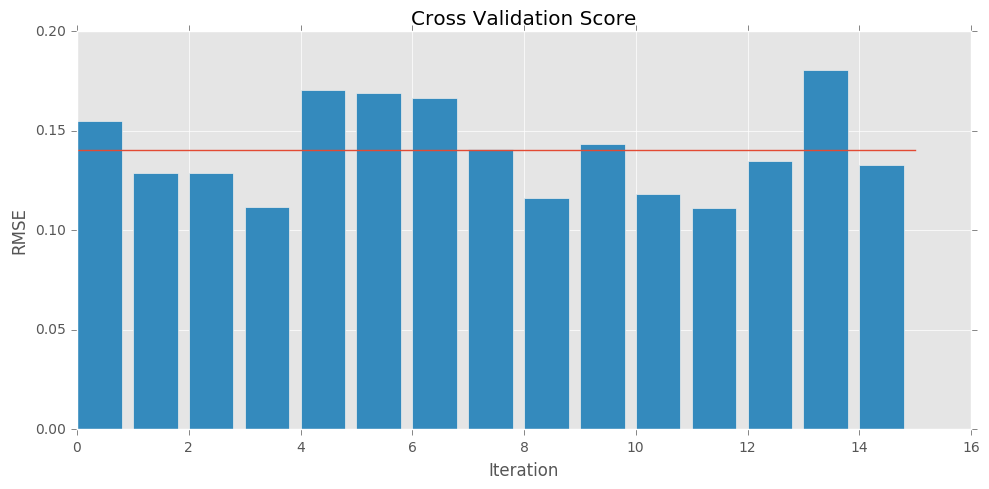

In [45]:
from sklearn.metrics import make_scorer, mean_squared_error
scorer = make_scorer(mean_squared_error, False)

clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
cv_score = np.sqrt(-cross_val_score(estimator=clf, X=X_train, y=y_train, cv=15, scoring = scorer))

plt.figure(figsize=(10,5))
plt.bar(range(len(cv_score)), cv_score)
plt.title('Cross Validation Score')
plt.ylabel('RMSE')
plt.xlabel('Iteration')

plt.plot(range(len(cv_score) + 1), [cv_score.mean()] * (len(cv_score) + 1))
plt.tight_layout()

# Evaluate Feature Significance
Fit model with training data
Output feature importance coefficients, map them to their feature name, and sort values

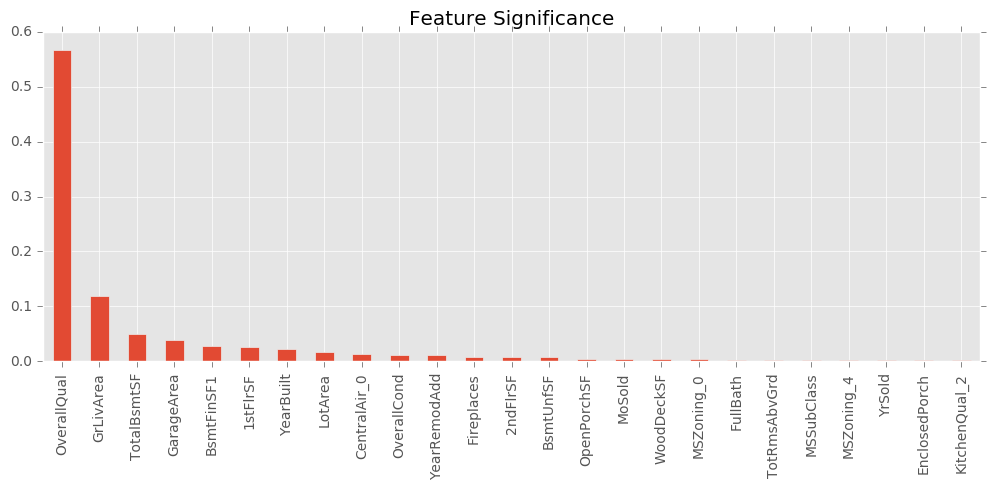

In [46]:
clf.fit(X_train, y_train)
coef = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

# Predicted vs Actual

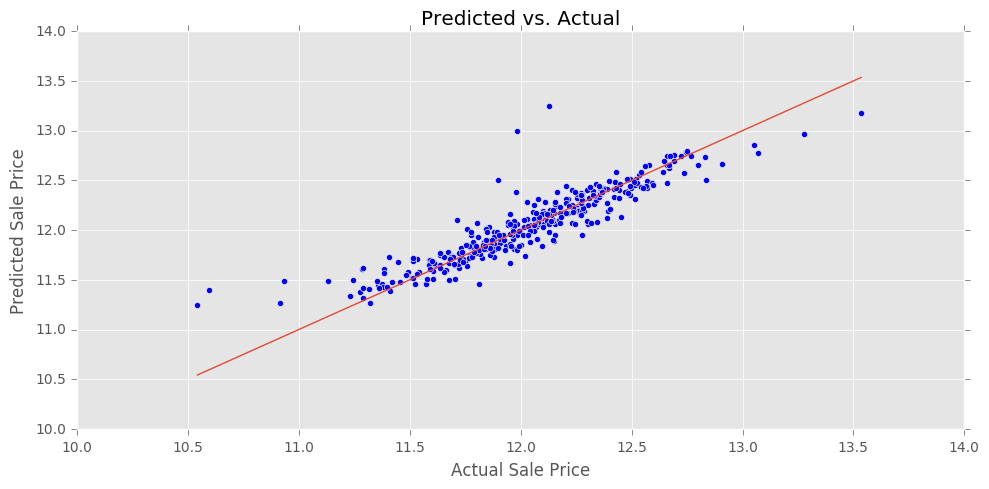

In [47]:
from sklearn.cross_validation import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train)
clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)

clf.fit(X_train1, y_train1)
y_pred = clf.predict(X_test1)

plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()